In [ ]:
# Importing necessary libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [3]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load dataset
file_path = '/kaggle/input/weather-prediction/seattle-weather.csv'
data = pd.read_csv(file_path)

data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [4]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
len(data)

1461

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [7]:
#Check Summary Stats
data.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [8]:
#Checking for missing values
data.isnull().sum()
#No nan values

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [9]:
#Converting date to datetime dtype
data['date'] = pd.to_datetime(data['date'])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [11]:
#Separating Day, Month and Year
data['date'] = pd.to_datetime(data['date'])
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

In [12]:
data.head()

,date,precipitation,temp_max,temp_min,wind,weather,day,month,year
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,1,1,2012
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2,1,2012
2,2012-01-03,0.8,11.7,7.2,2.3,rain,3,1,2012
3,2012-01-04,20.3,12.2,5.6,4.7,rain,4,1,2012
4,2012-01-05,1.3,8.9,2.8,6.1,rain,5,1,2012


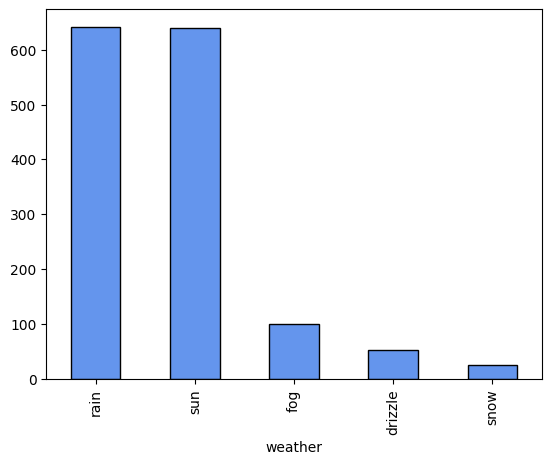

In [13]:
#Visualizing Weather
Weather_plot = data['weather'].value_counts().plot(kind='bar', color='cornflowerblue', edgecolor='black')

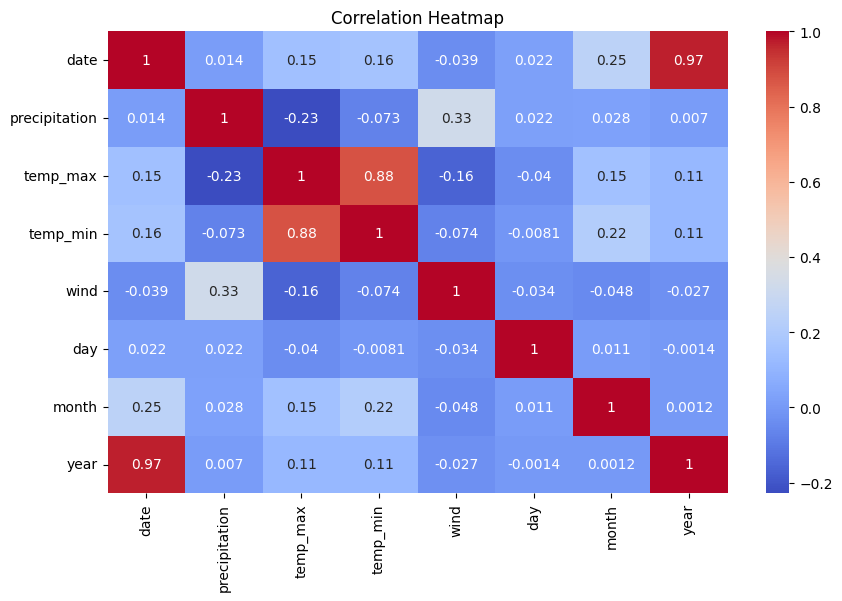

In [14]:
# Checking for feature Correlations
num_df = data.select_dtypes(exclude="object")
plt.figure(figsize=(10, 6))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

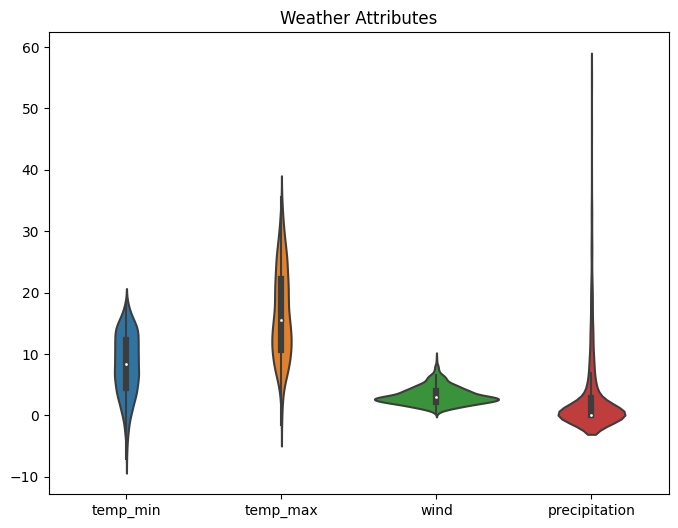

In [15]:
# Violin Plot on weather Attributes
plt.figure(figsize=(8, 6))
sns.violinplot(data=data[['temp_min','temp_max','wind','precipitation']])
plt.title('Weather Attributes')
plt.xticks()
plt.show()

In [16]:
# Assessing precipitation by month 
precip_table = data.groupby('month')['precipitation'].agg(['min', 'max', 'mean']).reset_index()
print(precip_table)

    month  min   max      mean
0       1  0.0  38.4  3.758065
1       2  0.0  26.4  3.734513
2       3  0.0  55.9  4.888710
3       4  0.0  39.1  3.128333
4       5  0.0  33.3  1.673387
5       6  0.0  16.5  1.107500
6       7  0.0  19.3  0.388710
7       8  0.0  32.5  1.320161
8       9  0.0  43.4  1.962500
9      10  0.0  34.5  4.059677
10     11  0.0  54.1  5.354167
11     12  0.0  54.1  5.021774


In [17]:
# Assessing precipitation by year
precip_table = data.groupby('year')['precipitation'].agg(['min', 'max', 'mean']).reset_index()
print(precip_table)

   year  min   max      mean
0  2012  0.0  54.1  3.349727
1  2013  0.0  43.4  2.268493
2  2014  0.0  46.7  3.377534
3  2015  0.0  55.9  3.121096


In [18]:
# Cross Variable Analysis

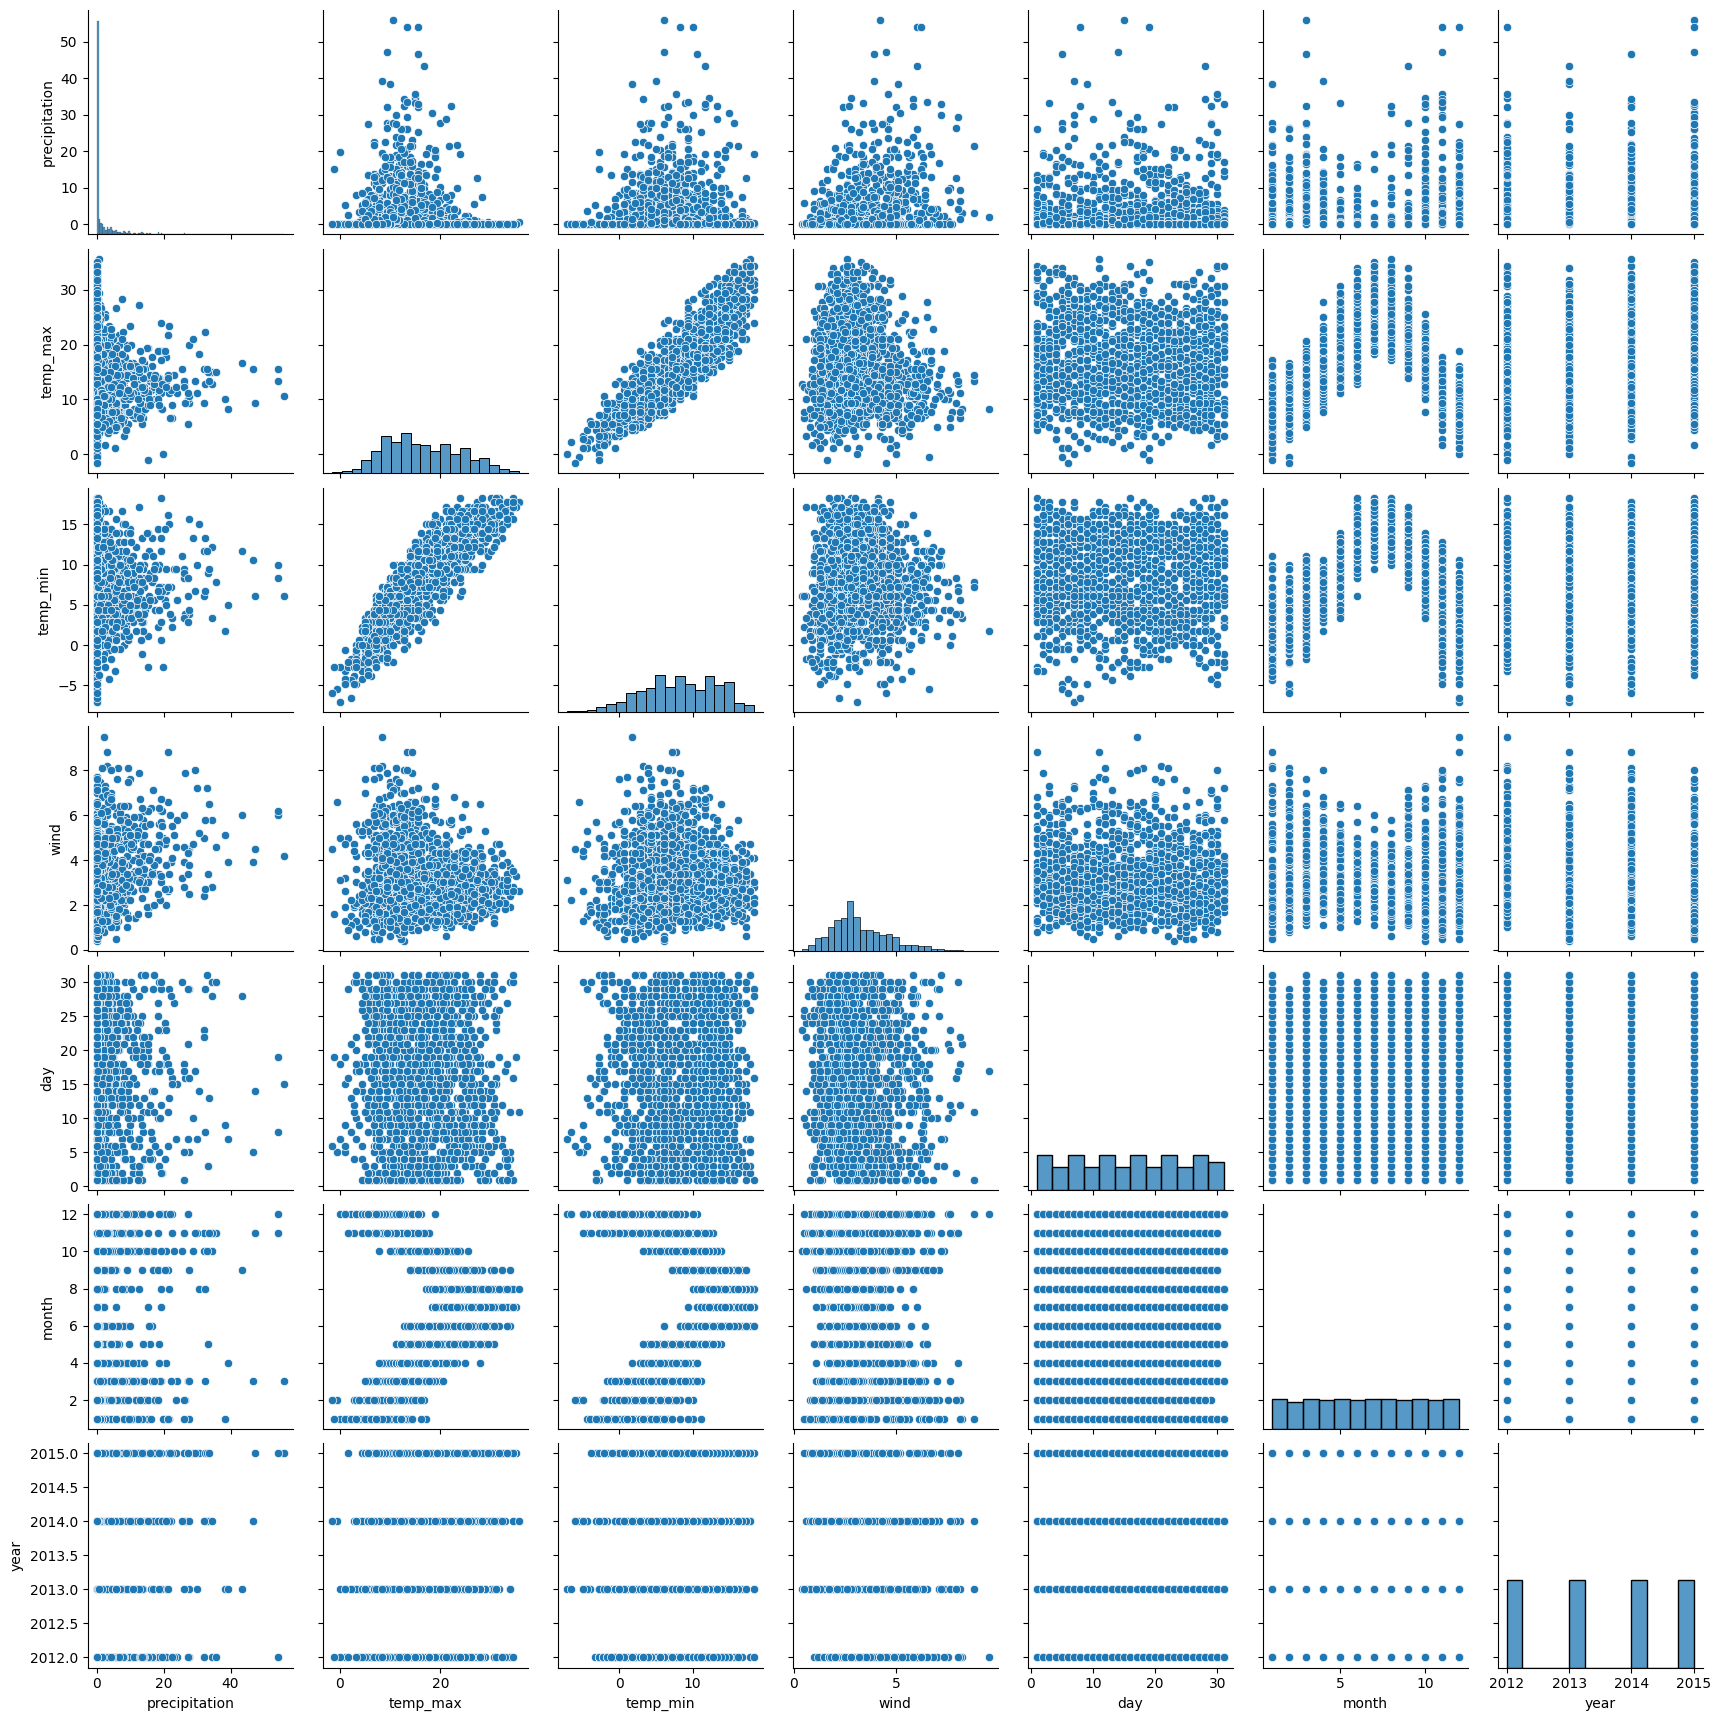

In [25]:
sns.pairplot(data)
plt.show()

<Axes: xlabel='year', ylabel='precipitation'>

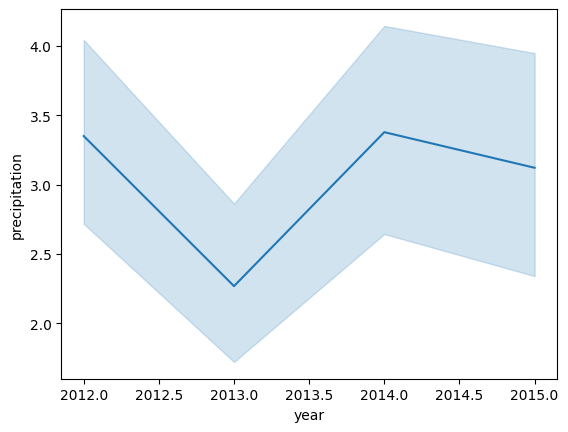

In [26]:
# Precipitation vs year
sns.lineplot(data = data, x = 'year', y = 'precipitation')

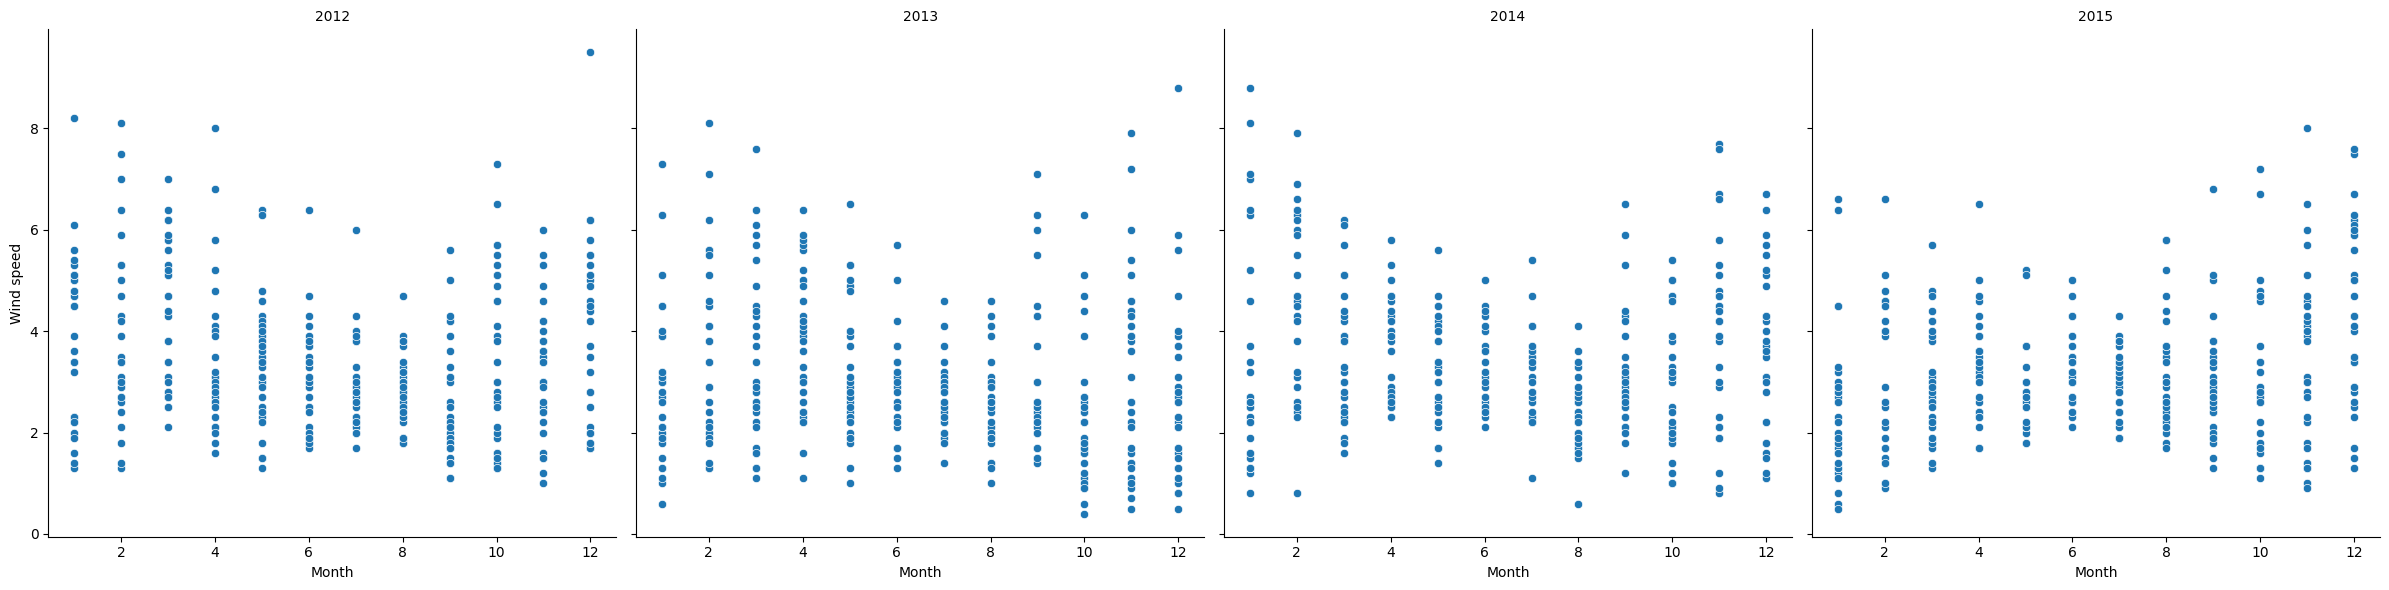

In [27]:
#Ploting Wind Speed by year:
g = sns.FacetGrid(data, col='year',height=6)
g.map(sns.scatterplot, 'month', 'wind')
g.set_axis_labels('Month', 'Wind speed')
g.set_titles(col_template="{col_name}")
plt.show()

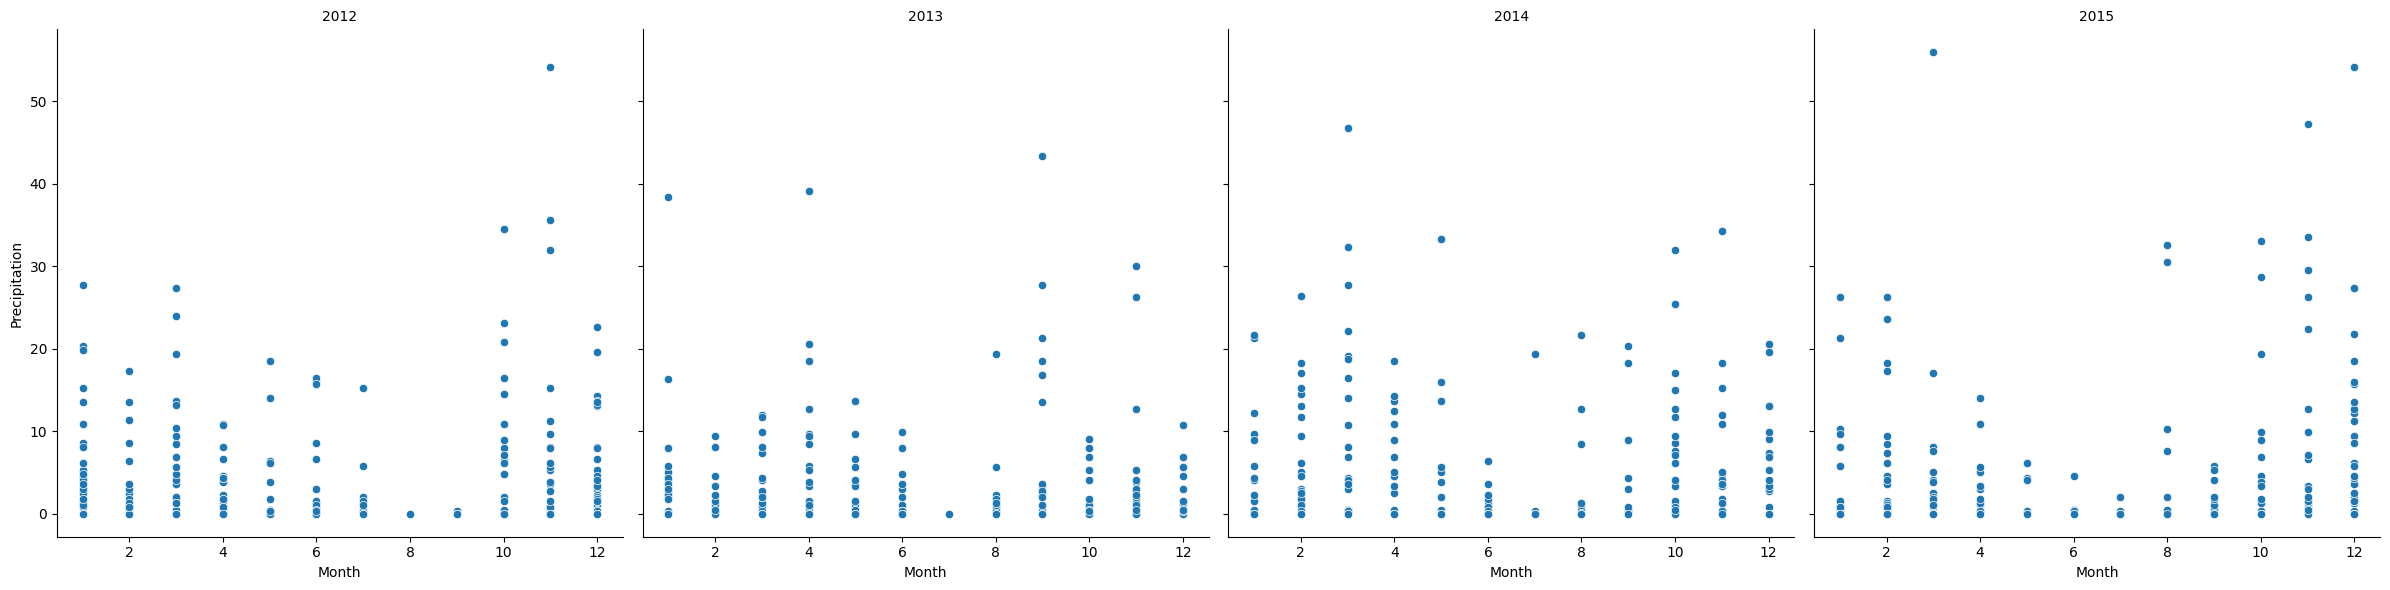

In [28]:
#Ploting Precipitation by year:
g = sns.FacetGrid(data, col='year',height=6)
g.map(sns.scatterplot, 'month', 'precipitation')
g.set_axis_labels('Month', 'Precipitation')
g.set_titles(col_template="{col_name}")
plt.show()

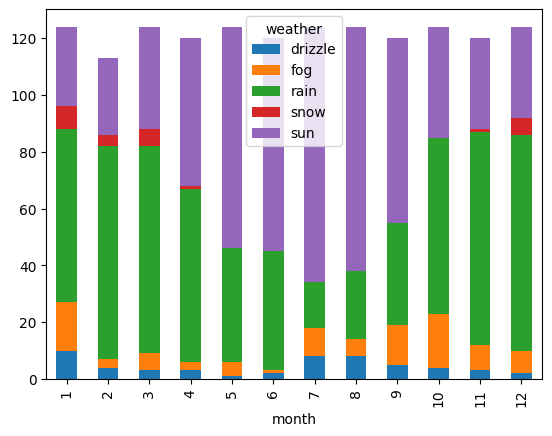

In [29]:
#Monthly weather plots
month_weather = data.groupby(['month'])['weather'].value_counts().unstack().plot(kind='bar',stacked = True)

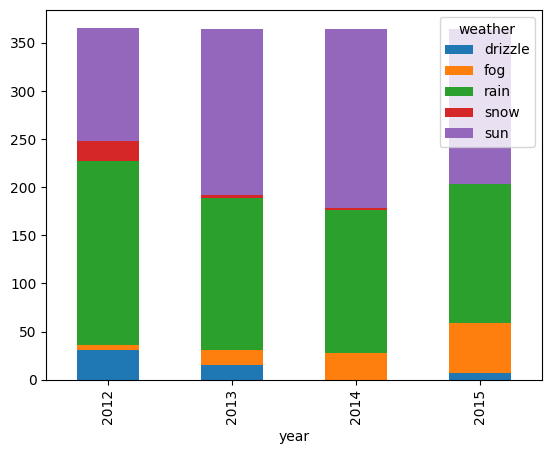

In [30]:
#Annual weather plots
annual_weather = data.groupby(['year'])['weather'].value_counts().unstack().plot(kind='bar',stacked = True)

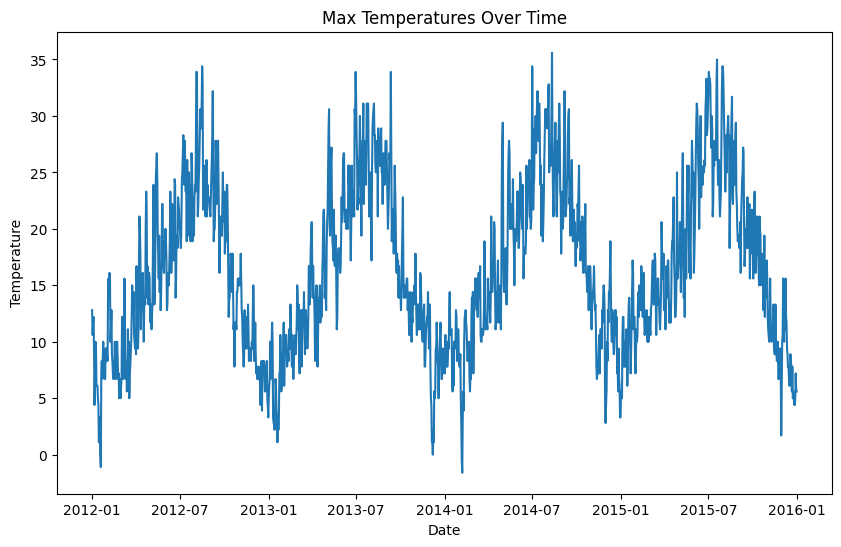

In [31]:
#Time Series Plot: (Max Temperature)
plt.figure(figsize=(10,6))
plt.plot(data['date'], data['temp_max'])
plt.title('Max Temperatures Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

weather
rain       43.874059
sun        43.805613
fog         6.913073
drizzle     3.627652
snow        1.779603
Name: count, dtype: float64

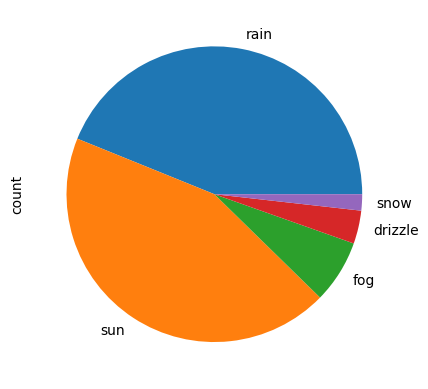

In [32]:
#Weather distribution plot
Weather_plot = data['weather'].value_counts().plot(kind='pie')

data['weather'].value_counts()/len(data)*100

In [33]:
# Prediction Models:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [34]:
data.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather',
       'day', 'month', 'year'],
      dtype='object')

In [35]:
# Droping umwanted columns
data.drop('date',axis=1,inplace=True)
data.drop('day',axis=1,inplace=True)

data.head()

,precipitation,temp_max,temp_min,wind,weather,month,year
0,0.0,12.8,5.0,4.7,drizzle,1,2012
1,10.9,10.6,2.8,4.5,rain,1,2012
2,0.8,11.7,7.2,2.3,rain,1,2012
3,20.3,12.2,5.6,4.7,rain,1,2012
4,1.3,8.9,2.8,6.1,rain,1,2012


In [36]:
# Encoding Target Variable
from sklearn.preprocessing import LabelEncoder
labels = LabelEncoder()

data['weather_encoded'] = labels.fit_transform(data['weather'])
data.head()

,precipitation,temp_max,temp_min,wind,weather,month,year,weather_encoded
0,0.0,12.8,5.0,4.7,drizzle,1,2012,0
1,10.9,10.6,2.8,4.5,rain,1,2012,2
2,0.8,11.7,7.2,2.3,rain,1,2012,2
3,20.3,12.2,5.6,4.7,rain,1,2012,2
4,1.3,8.9,2.8,6.1,rain,1,2012,2


In [37]:
#Droping weather column:
df = data.drop(['weather'], axis=1)
df.head()

,precipitation,temp_max,temp_min,wind,month,year,weather_encoded
0,0.0,12.8,5.0,4.7,1,2012,0
1,10.9,10.6,2.8,4.5,1,2012,2
2,0.8,11.7,7.2,2.3,1,2012,2
3,20.3,12.2,5.6,4.7,1,2012,2
4,1.3,8.9,2.8,6.1,1,2012,2


In [38]:
# Separate independent vars and target
X = df.drop('weather_encoded', axis=1)
y = df['weather_encoded']

X.head()

,precipitation,temp_max,temp_min,wind,month,year
0,0.0,12.8,5.0,4.7,1,2012
1,10.9,10.6,2.8,4.5,1,2012
2,0.8,11.7,7.2,2.3,1,2012
3,20.3,12.2,5.6,4.7,1,2012
4,1.3,8.9,2.8,6.1,1,2012


In [39]:
#Spliting data for training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [40]:
# Decision Tree Model:
model_DT = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
model_DT.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)

In [41]:
DT_pred_train = model_DT.predict(X_train)
DT_pred_test = model_DT.predict(X_test)

In [42]:
#Accuracy on Train data
accuracy = accuracy_score(y_train, DT_pred_train)
print(accuracy)

0.8684931506849315


In [43]:
#Accuracy on Test data
accuracy = accuracy_score(y_test, DT_pred_test)
print(accuracy)

0.8497267759562842


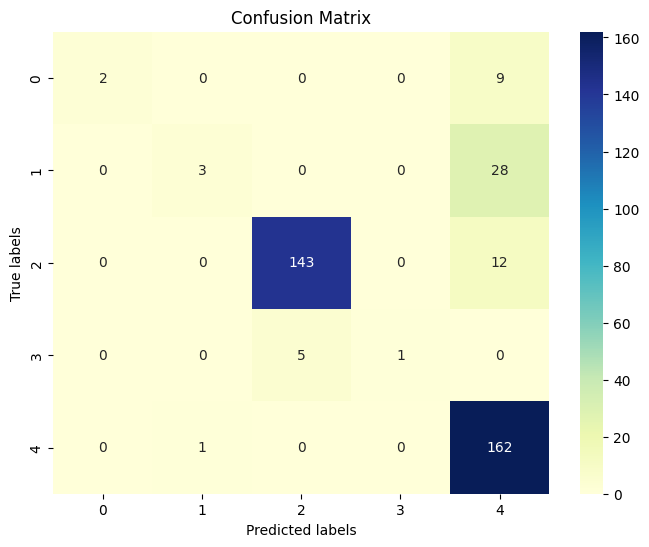

In [44]:
cm = confusion_matrix(y_test, DT_pred_test)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm,cmap='YlGnBu',fmt='d',annot=True,)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [45]:
#Generate classification report
report = classification_report(y_test, DT_pred_test)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.18      0.31        11
           1       0.75      0.10      0.17        31
           2       0.97      0.92      0.94       155
           3       1.00      0.17      0.29         6
           4       0.77      0.99      0.87       163

    accuracy                           0.85       366
   macro avg       0.90      0.47      0.52       366
weighted avg       0.86      0.85      0.81       366



In [46]:
# Random Forest Model:
model_RF = RandomForestClassifier()
model_RF.fit(X_train, y_train)

RandomForestClassifier()

In [47]:
RF_pred_train = model_RF.predict(X_train)
RF_pred_test = model_RF.predict(X_test)

In [48]:
#Accuracy on Train data
accuracy = accuracy_score(y_train, RF_pred_train)
print(accuracy)

0.9990867579908675


In [49]:
#Accuracy on Test data
accuracy = accuracy_score(y_test, RF_pred_test)
print(accuracy)

0.8333333333333334


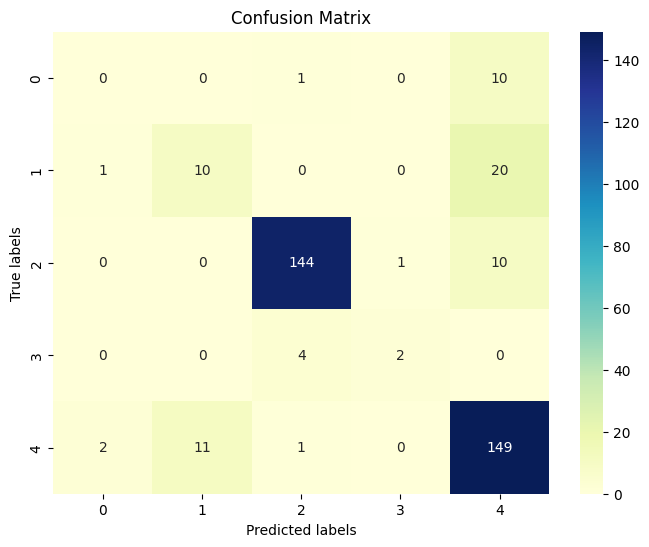

In [50]:
cm = confusion_matrix(y_test, RF_pred_test)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm,cmap='YlGnBu',fmt='d',annot=True,)
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

<Axes: >

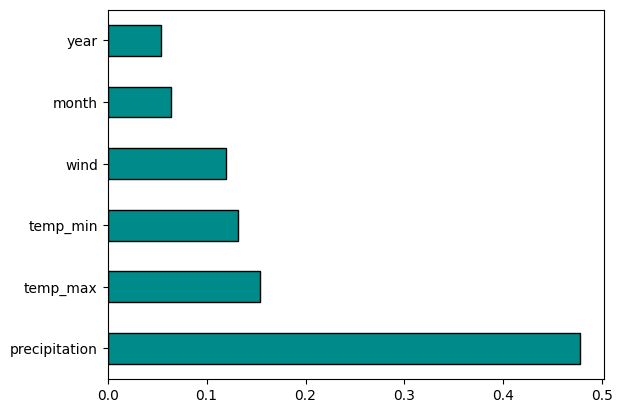

In [51]:
# Plot predicting variable feature importances
feat_importances = pd.Series(model_RF.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh',color='darkcyan',edgecolor='black')

In [52]:
#Generate classification report
report = classification_report(y_test, RF_pred_test)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.48      0.32      0.38        31
           2       0.96      0.93      0.94       155
           3       0.67      0.33      0.44         6
           4       0.79      0.91      0.85       163

    accuracy                           0.83       366
   macro avg       0.58      0.50      0.52       366
weighted avg       0.81      0.83      0.82       366

